# Import packages, read in data

In [10]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/damurphy/Desktop/snippets/dht-photoresistor-button-toDataset/esp8266_readings - Sheet1.csv')
x = df['Dig Button on/off'].values
y = df['Photoresistor'].values
print(y.shape)
print(x.shape)

(1392,)
(1392,)


# Split values in 'Temp (celsius); Humidity'

In [11]:
def splitColumn(col):
    temperature = []
    humidity = []
    for val in df[col].values:
        arr = str(val).split(';')
        temperature.append(arr[0])
        humidity.append(arr[1])
    df['Temperature'] = temperature
    df['Humidity'] = humidity
    return df
splitColumn('Temp (celsius); Humidity')
df = df.drop('Temp (celsius); Humidity', 1)
print(df)

                       Date & Time        Event Name  Dig Button on/off  \
0     November 21, 2019 at 03:59PM  esp8266_readings                  0   
1     November 21, 2019 at 04:00PM  esp8266_readings                  0   
2     November 21, 2019 at 04:01PM  esp8266_readings                  0   
3     November 21, 2019 at 04:02PM  esp8266_readings                  0   
4     November 21, 2019 at 04:03PM  esp8266_readings                  0   
...                            ...               ...                ...   
1387  November 22, 2019 at 03:16PM  esp8266_readings                  1   
1388  November 22, 2019 at 03:17PM  esp8266_readings                  1   
1389  November 22, 2019 at 03:18PM  esp8266_readings                  1   
1390  November 22, 2019 at 03:19PM  esp8266_readings                  1   
1391  November 22, 2019 at 03:20PM  esp8266_readings                  1   

      Photoresistor Temperature Humidity  
0               896       18.00    50.00  
1            

# Correlation

                   Dig Button on/off  Photoresistor
Dig Button on/off           1.000000      -0.258255
Photoresistor              -0.258255       1.000000


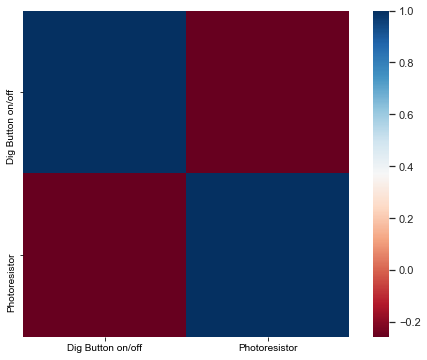

In [13]:
#reshape into an array 
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
print(df.corr())
plt.subplots(figsize=(8.5,6))
sb.set(style='darkgrid')
sb.heatmap(df.corr(method='pearson'), square=True, cmap='RdBu')

# Scatterplot

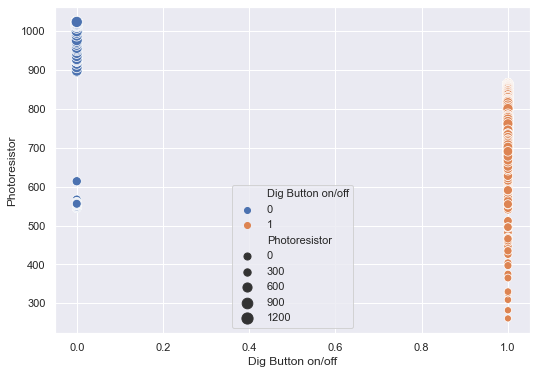

In [17]:
plt.subplots(figsize = (8.5, 6))
sb.scatterplot(x = "Dig Button on/off", y = "Photoresistor", data = df, hue = "Dig Button on/off", size="Photoresistor", sizes = (50, 125))


# Lin Reg Model

In [34]:
from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = .3, random_state = 42)
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error

print("R^2: {}".format(reg.score(x_test, y_test)))
print("rmse: {}".format(np.sqrt(mean_squared_error(y_test, y_pred)))) # rmse between testing and predicted y data

R^2: 0.060098357320140454
rmse: 148.8156361054467


In [36]:
# cross validation
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(reg, x, y, cv= 3)
print("The R^2 results from cross validation testing with 3 folds are {}".format(cv_results))
print("\n")
print("The mean R^2 result from cross-validation testing with 3 folds is {}".format(np.mean(cv_results)))

The R^2 results from cross validation testing with 3 folds are [-0.02333757 -0.21846615 -0.08000636]


The mean R^2 result from cross-validation testing with 3 folds is -0.10727002519674222


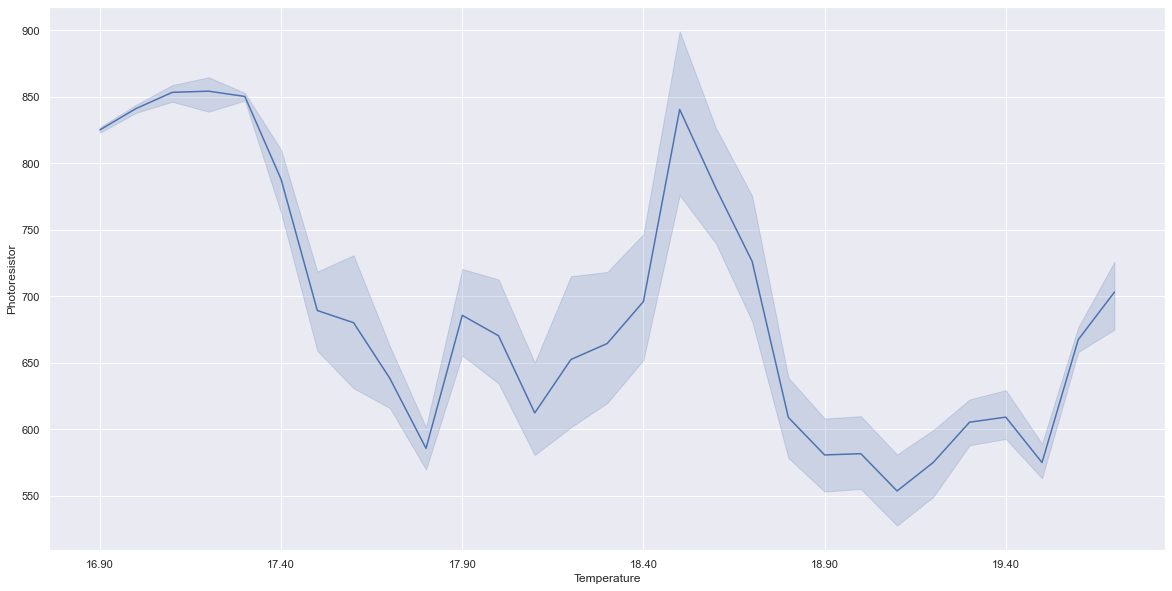

In [37]:
plt.subplots(figsize = (20, 10))
plt.xticks(np.arange(0, 30, step = 5))
sb.lineplot(x = "Temperature", y = "Photoresistor", data = df)


In [39]:
from sklearn.model_selection import train_test_split
reg = LinearRegression()
tempX_test, tempX_train, tempY_test, tempY_train = train_test_split(x_Temp, y, test_size = .3, random_state = 42)
reg.fit(tempX_train, tempY_train)
y_pred = reg.predict(tempX_test)

In [42]:
from sklearn.metrics import mean_squared_error
print("The rmse between Temperature and Photoresistor Pixel Value is: {}".format(np.sqrt(mean_squared_error(tempY_test, y_pred))))
print("\n")
print("The R^2 value between Temperature and Photoresistor Pixel Value is: {}".format(reg.score(tempX_test, tempY_test)))



The rmse between Temperature and Photoresistor Pixel Value is: 142.69126887087688


The R^2 value between Temperature and Photoresistor Pixel Value is: 0.13586801920770075


In [43]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(reg, x_Temp, y, cv = 3)
print(np.mean(cv_results))

0.08957254982137675
